# OpenEO Client Demo

This notebook demonstrates how an openEO job execution can be managed from Python.

To run this notebook, an early adopters account is necessary. Please obtain one via this link:
https://openeo.cloud/early-adopters/

In [2]:
import json
import openeo

In [3]:
connection = openeo.connect('https://openeo.cloud').authenticate_oidc()

Authenticated using refresh token.


In [5]:
job = connection.create_job(json.load(open("openeo-processing-graph.json"))['process_graph'])

In [6]:
job.start_and_wait()

0:00:00 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': send 'start'
0:00:39 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:00:45 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:00:55 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:01:04 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:01:15 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:01:28 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:01:46 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:02:05 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:02:30 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:03:01 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': queued (progress N/A)
0:03:39 Job 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0': finished (progress N/A)


<RESTJob job_id='vito-f3b21d80-328f-428d-a773-37b7d36e83f0'>

In [8]:
job.describe_job()

{'created': '2022-04-04T10:31:54Z',
 'id': 'vito-f3b21d80-328f-428d-a773-37b7d36e83f0',
 'process': {'process_graph': {'1': {'arguments': {'bands': ['B02',
      'B03',
      'B04'],
     'id': 'SENTINEL2_L2A_SENTINELHUB',
     'spatial_extent': {'east': 84.30320684519523,
      'north': 28.28834175540571,
      'south': 28.268476701871247,
      'west': 84.25171700124623},
     'temporal_extent': ['2019-03-12T00:01:00Z', '2019-03-18T00:01:00Z']},
    'position': [0, 0],
    'process_id': 'load_collection'},
   '2': {'arguments': {'data': {'from_node': '1'}, 'format': 'GTIFF'},
    'position': [240, 0],
    'process_id': 'save_result',
    'result': True}}},
 'status': 'finished',
 'updated': '2022-04-04T10:32:36Z',
 'usage': {'cpu': {'unit': 'cpu-seconds', 'value': 1355},
  'duration': {'unit': 'seconds', 'value': 148},
  'memory': {'unit': 'mb-seconds', 'value': 3710357}}}

In [11]:
job_results = job.get_results()

In [21]:
job_results.get_assets()

[<ResultAsset 'openEO_2019-03-12Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.vito.be/openeo/1.0/jobs/f3b21d80-328f-428d-a773-37b7d36e83f0/results/ZmNlYmNiZDNhZTMxMjZjOTNkNTY3OWM4ZWEzNDg0MjcxMTA1YTM2MTU4MTBmNDAwMzY5MWI0Mjk5ZWU3N2U5YkBlZ2kuZXU%3D/64ecc7cb3ded0fc32a592665487813b7/openEO_2019-03-12Z.tif?expires=1649673910'>,
 <ResultAsset 'openEO_2019-03-17Z.tif' (type image/tiff; application=geotiff) at 'https://openeo.vito.be/openeo/1.0/jobs/f3b21d80-328f-428d-a773-37b7d36e83f0/results/ZmNlYmNiZDNhZTMxMjZjOTNkNTY3OWM4ZWEzNDg0MjcxMTA1YTM2MTU4MTBmNDAwMzY5MWI0Mjk5ZWU3N2U5YkBlZ2kuZXU%3D/2fc8cfe0e96b5f38af393a6525bffa99/openEO_2019-03-17Z.tif?expires=1649673910'>]

In [16]:
downloaded_files = job_results.download_files("/home/jovyan/results")
downloaded_files

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


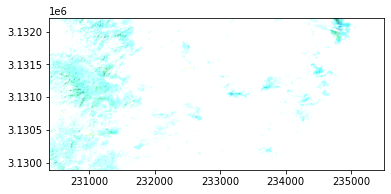

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


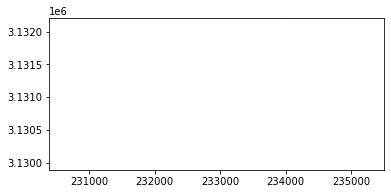

In [18]:
import rasterio
from rasterio.plot import show

for path in downloaded_files:
    img = rasterio.open(path)
    show(img)